<a href="https://colab.research.google.com/github/ksmarianiq/DataAnalyst/blob/main/Analayse_des_donnes_des_ventes_d'un_supermarche.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyse des donnees d'un supermarche

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [3]:
data = "datasets/SalesAnalysis/Sales_Data/"

In [4]:
janvier_sales= pd.read_csv("https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_April_2019.csv")

In [5]:
janvier_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
janvier_sales.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,18324,18324,18324,18324,18324,18324
unique,17538,20,8,19,13584,17120
top,Order ID,Lightning Charging Cable,1,14.95,Order Date,Purchase Address
freq,35,2201,16558,2201,35,35


In [7]:
janvier_sales.T

,0,1,2,3,4,5,6,7,8,9,...,18373,18374,18375,18376,18377,18378,18379,18380,18381,18382
Order ID,176558,NaN,176559,176560,176560,176561,176562,176563,176564,176565,...,194085,194086,194087,194088,194089,194090,194091,194092,194093,194094
Product,USB-C Charging Cable,NaN,Bose SoundSport Headphones,Google Phone,Wired Headphones,Wired Headphones,USB-C Charging Cable,Bose SoundSport Headphones,USB-C Charging Cable,Macbook Pro Laptop,...,Wired Headphones,Google Phone,USB-C Charging Cable,AAA Batteries (4-pack),USB-C Charging Cable,Google Phone,AA Batteries (4-pack),AAA Batteries (4-pack),AA Batteries (4-pack),Lightning Charging Cable
Quantity Ordered,2,NaN,1,1,1,1,1,1,1,1,...,1,1,2,2,1,1,1,2,1,1
Price Each,11.95,NaN,99.99,600,11.99,11.99,11.95,99.99,11.95,1700,...,11.99,600,11.95,2.99,11.95,600,3.84,2.99,3.84,14.95
Order Date,04/19/19 08:46,NaN,04/07/19 22:30,04/12/19 14:38,04/12/19 14:38,04/30/19 09:27,04/29/19 13:03,04/02/19 07:46,04/12/19 10:58,04/24/19 10:38,...,04/17/19 20:12,04/28/19 08:50,04/26/19 11:44,04/04/19 18:46,04/09/19 17:15,04/08/19 17:11,04/15/19 16:02,04/28/19 14:36,04/14/19 15:09,04/18/19 11:08
Purchase Address,"917 1st St, Dallas, TX 75001",NaN,"682 Chestnut St, Boston, MA 02215","669 Spruce St, Los Angeles, CA 90001","669 Spruce St, Los Angeles, CA 90001","333 8th St, Los Angeles, CA 90001","381 Wilson St, San Francisco, CA 94016","668 Center St, Seattle, WA 98101","790 Ridge St, Atlanta, GA 30301","915 Willow St, San Francisco, CA 94016",...,"315 12th St, Los Angeles, CA 90001","981 Dogwood St, Los Angeles, CA 90001","35 13th St, Portland, OR 97035","718 12th St, Austin, TX 73301","458 11th St, San Francisco, CA 94016","177 Jackson St, Los Angeles, CA 90001","311 Forest St, Austin, TX 73301","347 Sunset St, San Francisco, CA 94016","835 Lake St, Portland, OR 97035","354 North St, Boston, MA 02215"


In [8]:
mois = ["January", "February", "March", "April", "May", "June", "July", "August",
                  "September", "October", "November", "December"]
files = [f"https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_{month}_2019.csv" for month in mois]

In [9]:
df = pd.DataFrame()

for liens in files:
  data_interm = pd.read_csv(liens)
  df = pd.concat([df, data_interm])

In [10]:
df.shape

(186850, 6)

In [11]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [13]:
df.isnull().sum(axis=0)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [14]:
df.notnull().sum(axis=0)

Order ID            186305
Product             186305
Quantity Ordered    186305
Price Each          186305
Order Date          186305
Purchase Address    186305
dtype: int64

In [15]:
df.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
25112    False
25113    False
25114    False
25115    False
25116    False
Length: 186850, dtype: bool

In [16]:
df["Product"]

0                            iPhone
1          Lightning Charging Cable
2                  Wired Headphones
3                  27in FHD Monitor
4                  Wired Headphones
                    ...            
25112      Lightning Charging Cable
25113         AA Batteries (4-pack)
25114               Vareebadd Phone
25115              Wired Headphones
25116    Bose SoundSport Headphones
Name: Product, Length: 186850, dtype: object

In [85]:
valeur_manquantes =df[df.isnull().any(axis=1)]
valeur_manquantes

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [86]:
valeur_manquantes.isnull().all()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [19]:
df.shape

(186850, 6)

In [20]:
df.dropna(inplace = True)

In [21]:
df.shape

(186305, 6)

In [22]:
df.isnull()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
25112,False,False,False,False,False,False
25113,False,False,False,False,False,False
25114,False,False,False,False,False,False
25115,False,False,False,False,False,False


In [23]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [24]:
df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [25]:
df["Order Date"]

0        01/22/19 21:25
1        01/28/19 14:15
2        01/17/19 13:33
3        01/05/19 20:33
4        01/25/19 11:59
              ...      
25112    12/11/19 20:58
25113    12/01/19 12:01
25114    12/09/19 06:43
25115    12/03/19 10:39
25116    12/21/19 21:45
Name: Order Date, Length: 186305, dtype: object

In [26]:
df[df["Order ID"]=="Order ID"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
23198,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23337,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
24192,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [27]:
df['Order ID'].str.isdigit()

0        True
1        True
2        True
3        True
4        True
         ... 
25112    True
25113    True
25114    True
25115    True
25116    True
Name: Order ID, Length: 186305, dtype: bool

In [28]:
~df['Order ID'].str.isdigit()

0        False
1        False
2        False
3        False
4        False
         ...  
25112    False
25113    False
25114    False
25115    False
25116    False
Name: Order ID, Length: 186305, dtype: bool

In [29]:
df.loc[~df['Order ID'].str.isdigit(), : ]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
23198,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23337,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
24192,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [30]:
df.loc[~df['Order ID'].str.isdigit(), : ]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
23198,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23337,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
24192,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [31]:
df.loc[df["Order ID"]=="Order ID",:].index

Int64Index([ 1073,  1102,  1194,  1897,  2463,  3115,  3247,  3612,  3623,
             4901,
            ...
            20986, 21148, 21549, 22054, 22375, 23198, 23337, 23748, 24192,
            24222],
           dtype='int64', length=355)

In [32]:
df_clean = df.drop(df.loc[df["Order ID"]=="Order ID",:].index)
df_clean

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [33]:
df_clean.loc[~df["Order ID"].str.isdigit()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [34]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [35]:
df_clean["Price Each"] = pd.to_numeric(df_clean["Price Each"])

In [36]:
df_clean["Order Date"] = pd.to_datetime(df_clean["Order Date"])

In [37]:
df_clean['Quantity Ordered'] = df_clean['Quantity Ordered'].astype('int')

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          182735 non-null  object        
 1   Product           182735 non-null  object        
 2   Quantity Ordered  182735 non-null  int64         
 3   Price Each        182735 non-null  float64       
 4   Order Date        182735 non-null  datetime64[ns]
 5   Purchase Address  182735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.8+ MB


In [39]:
df["Order Date"]

0        01/22/19 21:25
1        01/28/19 14:15
2        01/17/19 13:33
3        01/05/19 20:33
4        01/25/19 11:59
              ...      
25112    12/11/19 20:58
25113    12/01/19 12:01
25114    12/09/19 06:43
25115    12/03/19 10:39
25116    12/21/19 21:45
Name: Order Date, Length: 186305, dtype: object

In [40]:
df_clean["Order Date"]

0       2019-01-22 21:25:00
1       2019-01-28 14:15:00
2       2019-01-17 13:33:00
3       2019-01-05 20:33:00
4       2019-01-25 11:59:00
                ...        
25112   2019-12-11 20:58:00
25113   2019-12-01 12:01:00
25114   2019-12-09 06:43:00
25115   2019-12-03 10:39:00
25116   2019-12-21 21:45:00
Name: Order Date, Length: 182735, dtype: datetime64[ns]

Quel est le meilleur mois de vente ? et Quel est le chiffre d'affaires de ce mois ?

In [41]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [42]:
df_clean["Quantity Ordered"].value_counts()

1    165650
2     13082
3      2870
4       789
5       232
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

In [43]:
df_clean  = df_clean.set_index('Order Date')

In [44]:
df_clean.sort_index(inplace=True)

In [45]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001"
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016"
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001"
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001"
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301"


In [46]:
df_clean['Month'] = df_clean.index.month_name()

In [47]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month
Order Date,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January


In [48]:
df_clean['chiffre_daffaire'] = df_clean['Quantity Ordered'] * df_clean['Price Each']

In [49]:
df_clean.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire
Order Date,,,,,,,
2019-11-29 17:01:00,287506,Lightning Charging Cable,1,14.95,"336 1st St, San Francisco, CA 94016",November,14.95
2019-03-16 10:51:00,165559,AA Batteries (4-pack),1,3.84,"239 Wilson St, Seattle, WA 98101",March,3.84
2019-02-07 19:39:00,158760,Apple Airpods Headphones,1,150.00,"508 Jackson St, San Francisco, CA 94016",February,150.00
2019-05-21 18:46:00,202557,Apple Airpods Headphones,1,150.00,"297 West St, Los Angeles, CA 90001",May,150.00
2019-10-07 12:28:00,276731,Apple Airpods Headphones,1,150.00,"191 Sunset St, Dallas, TX 75001",October,150.00


In [50]:
df_clean.groupby("Month")["chiffre_daffaire"].sum().sort_values(ascending=False)

Month
December     4557905.42
October      3679254.16
April        3336376.42
November     3149785.09
May          3101881.04
March        2755969.40
July         2587444.91
June         2524464.99
August       2191698.31
February     2158127.48
September    2050361.26
January      1786511.29
Name: chiffre_daffaire, dtype: float64

In [51]:
order = ["January", "February", "March", "April", "May", "June", "July", "August",
                  "September", "October", "November", "December"]

In [52]:
df_clean.groupby("Month")["chiffre_daffaire"].sum().loc[order]

Month
January      1786511.29
February     2158127.48
March        2755969.40
April        3336376.42
May          3101881.04
June         2524464.99
July         2587444.91
August       2191698.31
September    2050361.26
October      3679254.16
November     3149785.09
December     4557905.42
Name: chiffre_daffaire, dtype: float64

Text(0.5, 1.0, "Chiffre d'affaire global par mois")

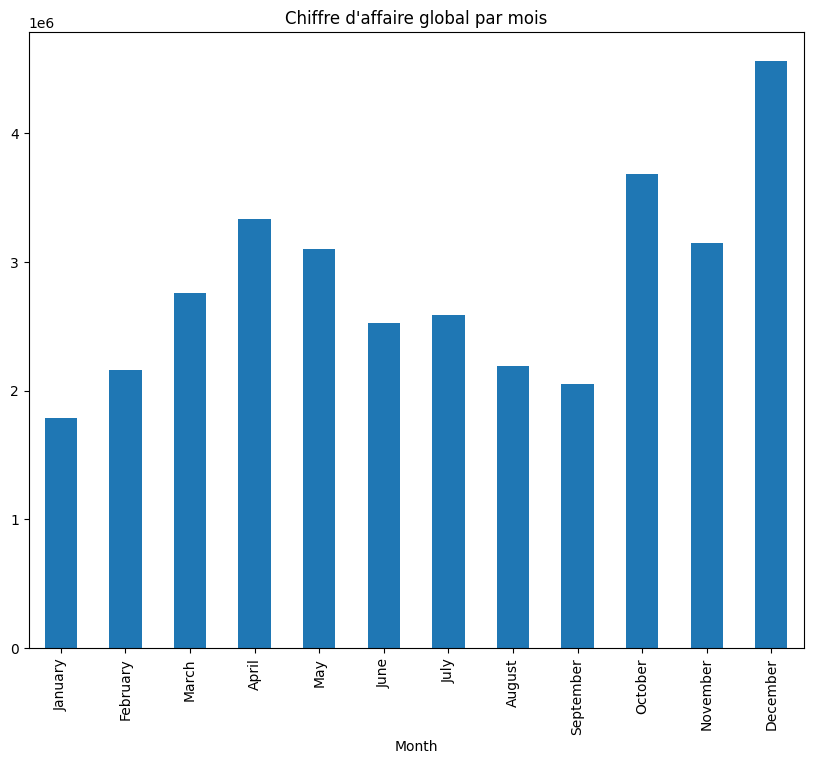

In [53]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().loc[order].plot.bar(figsize=(10, 8))
plt.title("Chiffre d'affaire global par mois")

In [54]:
df_clean.groupby('Month').sum()["chiffre_daffaire"].sort_values(ascending=False).December

<ipython-input-54-035356477bb8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clean.groupby('Month').sum()["chiffre_daffaire"].sort_values(ascending=False).December


4557905.42

Décembre est le mois avec le plus de ventes et le CA est de 4557905.420001525

Dans quelle ville a-t-on le plus vendu de produits ?

In [55]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire
Order Date,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90


In [56]:
df_clean["Purchase Address"].unique()

array(['9 Lake St, New York City, NY 10001',
       '760 Church St, San Francisco, CA 94016',
       '735 5th St, New York City, NY 10001', ...,
       '731 7th St, New York City, NY 10001',
       '754 Hickory St, New York City, NY 10001',
       '657 Spruce St, New York City, NY 10001'], dtype=object)

In [57]:
df_clean.groupby("Purchase Address")["chiffre_daffaire"].sum().sort_values(ascending=False)

Purchase Address
668 Park St, San Francisco, CA 94016     4379.99
795 1st St, Atlanta, GA 30301            4100.00
391 1st St, Seattle, WA 98101            4100.00
10 1st St, San Francisco, CA 94016       4000.00
731 11th St, New York City, NY 10001     3919.88
                                          ...   
612 13th St, Portland, OR 97035             2.99
210 Johnson St, Dallas, TX 75001            2.99
894 River St, New York City, NY 10001       2.99
478 4th St, San Francisco, CA 94016         2.99
19 Pine St, Dallas, TX 75001                2.99
Name: chiffre_daffaire, Length: 138946, dtype: float64

In [58]:
def get_ville(addresse):
  return addresse.split(',')[1].strip()

In [59]:
get_ville("9 Lake St, New York City, NY 10001")

'New York City'

In [60]:
df_clean['ville'] = df_clean['Purchase Address'].apply(get_ville)

In [61]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville
Order Date,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta


In [62]:
df_clean.groupby("ville")["chiffre_daffaire"].sum().sort_values(ascending=False)

ville
San Francisco    8124120.94
Los Angeles      5354039.93
New York City    4581658.91
Boston           3604080.86
Atlanta          2741642.05
Dallas           2717793.72
Seattle          2693048.60
Portland         2276649.24
Austin           1786745.52
Name: chiffre_daffaire, dtype: float64

In [63]:
df_clean.groupby("ville")["Quantity Ordered"].sum().sort_values(ascending=False)

ville
San Francisco    49363
Los Angeles      32722
New York City    27470
Boston           22123
Dallas           16453
Atlanta          16304
Seattle          16281
Portland         13806
Austin           10933
Name: Quantity Ordered, dtype: int64

<ipython-input-64-4d05feae0c57>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clean.groupby('ville').sum()["chiffre_daffaire"].sort_values(ascending=False).plot.barh(figsize=(10, 8))


<Axes: ylabel='ville'>

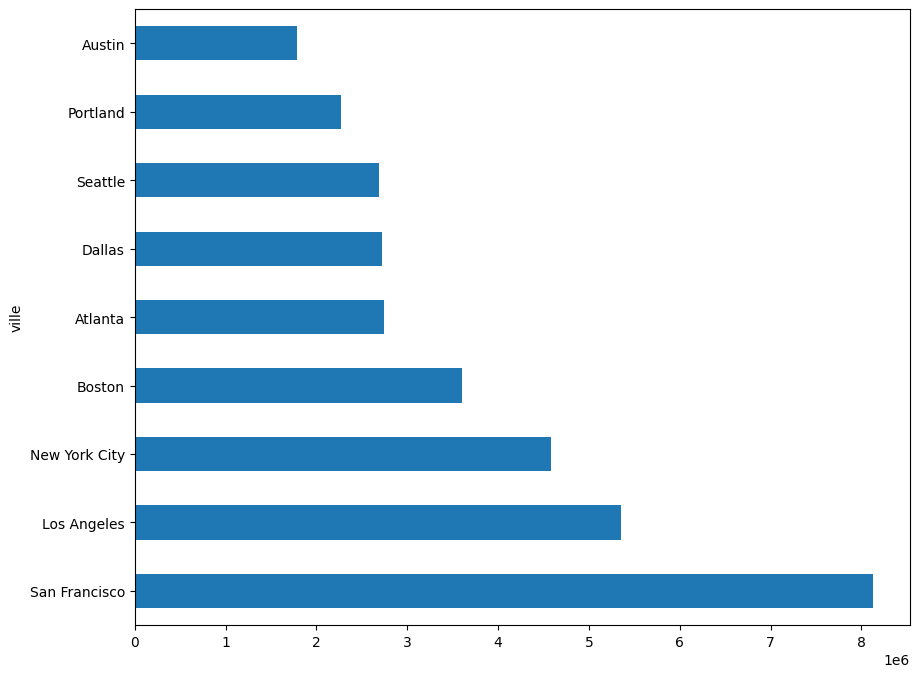

In [64]:
df_clean.groupby('ville').sum()["chiffre_daffaire"].sort_values(ascending=False).plot.barh(figsize=(10, 8))

A quelle heure devons-nous passer de la publicité pour augmenter nos ventes ?

In [65]:
df_clean['heure'] = df_clean.index.hour
df_clean['time'] = df_clean.index.time

In [66]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00


In [67]:
df_clean.groupby("heure")["chiffre_daffaire"].sum().sort_values(ascending=False)

heure
19    2370005.59
12    2269676.91
11    2267169.73
20    2242856.37
18    2176209.65
13    2118394.83
17    2086082.23
14    2045085.42
21    2013288.02
10    1907179.29
15    1900151.56
16    1864530.92
9     1612498.90
22    1578173.21
8     1181363.76
23    1161803.96
7      734595.75
0      698694.76
1      447663.86
6      441523.14
2      234191.08
5      224313.72
4      161350.57
3      142976.54
Name: chiffre_daffaire, dtype: float64

<Axes: ylabel='heure'>

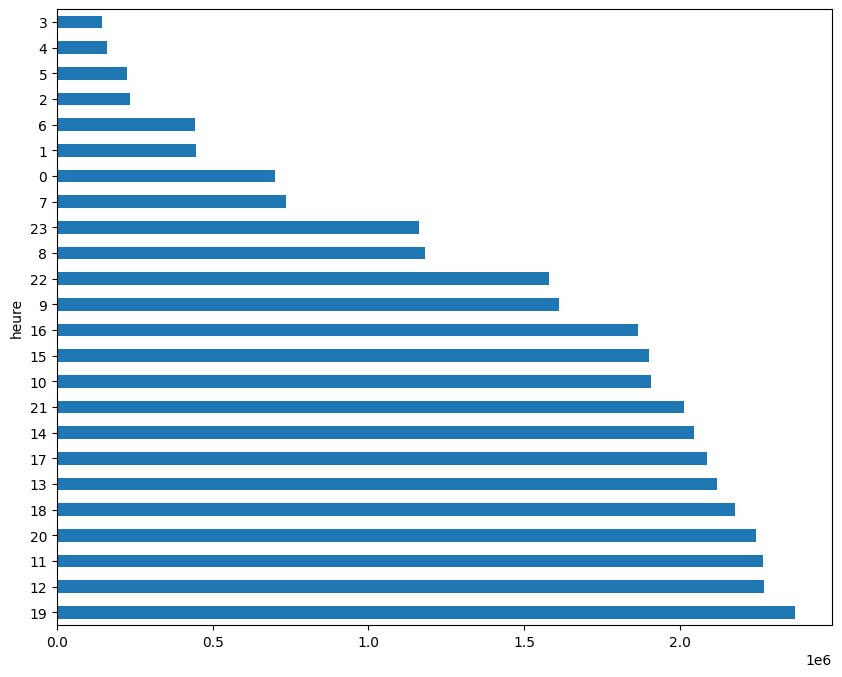

In [68]:
df_clean.groupby("heure")["chiffre_daffaire"].sum().sort_values(ascending=False).plot.barh(figsize=(10, 8))

In [69]:
ca_par_heure = pd.DataFrame(df_clean.groupby('heure')['chiffre_daffaire'].sum())
ca_par_heure

,chiffre_daffaire
heure,
0,698694.76
1,447663.86
2,234191.08
3,142976.54
4,161350.57
5,224313.72
6,441523.14
7,734595.75
8,1181363.76


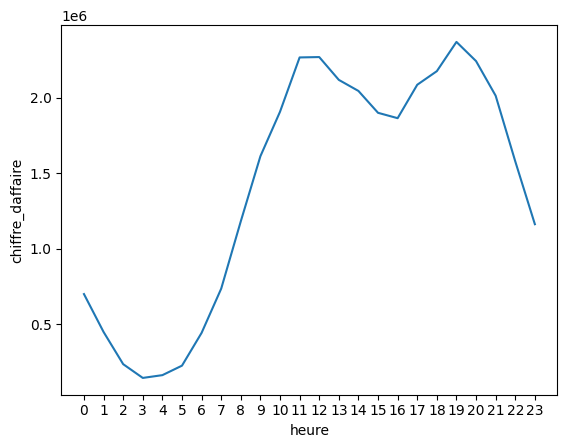

In [70]:
sns.lineplot(data=ca_par_heure['chiffre_daffaire'])
plt.xticks(ticks=range(0, 24))
plt.show()

On devrait afficher la publicité entre 10 et 11 et entre 18 et 19.

Quels sont les produits qui sont souvent achetés ensemble ?



In [71]:
df_clean["Order ID"].unique()

array(['147268', '148041', '149343', ..., '299125', '305840', '300519'],
      dtype=object)

In [72]:
df_m = df_clean[df_clean["Order ID"].duplicated(keep=False)]
df_m

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 07:29:00,144804,Wired Headphones,1,11.99,"628 Lake St, New York City, NY 10001",January,11.99,New York City,7,07:29:00
2019-01-01 07:29:00,144804,iPhone,1,700.00,"628 Lake St, New York City, NY 10001",January,700.00,New York City,7,07:29:00
2019-01-01 11:25:00,148074,Google Phone,1,600.00,"6 Johnson St, Atlanta, GA 30301",January,600.00,Atlanta,11,11:25:00
2019-01-01 11:25:00,148074,USB-C Charging Cable,1,11.95,"6 Johnson St, Atlanta, GA 30301",January,11.95,Atlanta,11,11:25:00
2019-01-01 12:02:00,148450,iPhone,1,700.00,"761 Lakeview St, Dallas, TX 75001",January,700.00,Dallas,12,12:02:00
...,...,...,...,...,...,...,...,...,...,...
2020-01-01 00:10:00,311386,Apple Airpods Headphones,1,150.00,"730 Pine St, San Francisco, CA 94016",January,150.00,San Francisco,0,00:10:00
2020-01-01 00:22:00,297817,Lightning Charging Cable,2,14.95,"519 13th St, New York City, NY 10001",January,29.90,New York City,0,00:22:00
2020-01-01 00:22:00,297817,iPhone,1,700.00,"519 13th St, New York City, NY 10001",January,700.00,New York City,0,00:22:00


In [73]:
df_m.groupby("Product")["Order ID"].first()

Product
20in Monitor                  142112
27in 4K Gaming Monitor        144900
27in FHD Monitor              146397
34in Ultrawide Monitor        148073
AA Batteries (4-pack)         149546
AAA Batteries (4-pack)        145369
Apple Airpods Headphones      141290
Bose SoundSport Headphones    142112
Flatscreen TV                 145369
Google Phone                  148074
LG Dryer                      146407
LG Washing Machine            144069
Lightning Charging Cable      148450
Macbook Pro Laptop            142727
ThinkPad Laptop               145698
USB-C Charging Cable          148074
Vareebadd Phone               147444
Wired Headphones              144804
iPhone                        144804
Name: Order ID, dtype: object

In [74]:
def concat_produit_par_order_id(p: list):
  return ";".join(p)

In [75]:
ensemble =df_m.groupby('Order ID')['Product'].apply(concat_produit_par_order_id)
ensemble

Order ID
141275              USB-C Charging Cable;Wired Headphones
141290     Apple Airpods Headphones;AA Batteries (4-pack)
141365                   Wired Headphones;Vareebadd Phone
141384                  USB-C Charging Cable;Google Phone
141450            Bose SoundSport Headphones;Google Phone
                               ...                       
319536                Wired Headphones;Macbook Pro Laptop
319556                      Google Phone;Wired Headphones
319584                            iPhone;Wired Headphones
319596                    Lightning Charging Cable;iPhone
319631    Lightning Charging Cable;34in Ultrawide Monitor
Name: Product, Length: 6928, dtype: object

In [76]:
from itertools import combinations
from collections import Counter

count = Counter()

In [77]:
ensemble.to_list()

['USB-C Charging Cable;Wired Headphones',
 'Apple Airpods Headphones;AA Batteries (4-pack)',
 'Wired Headphones;Vareebadd Phone',
 'USB-C Charging Cable;Google Phone',
 'Bose SoundSport Headphones;Google Phone',
 'Apple Airpods Headphones;iPhone',
 'Google Phone;Apple Airpods Headphones',
 'iPhone;Apple Airpods Headphones;Wired Headphones',
 'Apple Airpods Headphones;USB-C Charging Cable',
 'Wired Headphones;Lightning Charging Cable',
 'iPhone;Lightning Charging Cable',
 '27in FHD Monitor;Bose SoundSport Headphones',
 'USB-C Charging Cable;Google Phone',
 'Wired Headphones;iPhone',
 'Google Phone;USB-C Charging Cable',
 'AA Batteries (4-pack);AAA Batteries (4-pack)',
 'Vareebadd Phone;Wired Headphones;USB-C Charging Cable',
 'USB-C Charging Cable;Google Phone',
 'Vareebadd Phone;Wired Headphones',
 'Lightning Charging Cable;34in Ultrawide Monitor',
 'USB-C Charging Cable;Wired Headphones',
 'Lightning Charging Cable;Bose SoundSport Headphones',
 'Wired Headphones;Google Phone',
 'Wired

In [78]:
for achat in ensemble.to_list():
    products = achat.split(';')
#     print(products)
    count.update(Counter(combinations(products, 2)))

In [79]:
count

Counter({('USB-C Charging Cable', 'Wired Headphones'): 101,
         ('Apple Airpods Headphones', 'AA Batteries (4-pack)'): 37,
         ('Wired Headphones', 'Vareebadd Phone'): 82,
         ('USB-C Charging Cable', 'Google Phone'): 474,
         ('Bose SoundSport Headphones', 'Google Phone'): 115,
         ('Apple Airpods Headphones', 'iPhone'): 159,
         ('Google Phone', 'Apple Airpods Headphones'): 11,
         ('iPhone', 'Apple Airpods Headphones'): 196,
         ('iPhone', 'Wired Headphones'): 236,
         ('Apple Airpods Headphones', 'Wired Headphones'): 48,
         ('Apple Airpods Headphones', 'USB-C Charging Cable'): 24,
         ('Wired Headphones', 'Lightning Charging Cable'): 70,
         ('iPhone', 'Lightning Charging Cable'): 509,
         ('27in FHD Monitor', 'Bose SoundSport Headphones'): 13,
         ('Wired Headphones', 'iPhone'): 216,
         ('Google Phone', 'USB-C Charging Cable'): 492,
         ('AA Batteries (4-pack)', 'AAA Batteries (4-pack)'): 45,
       

In [80]:
count.most_common(1)

[(('iPhone', 'Lightning Charging Cable'), 509)]

In [81]:
for ensemble, c in count.most_common(10):
    print(ensemble, c)

('iPhone', 'Lightning Charging Cable') 509
('Google Phone', 'USB-C Charging Cable') 492
('USB-C Charging Cable', 'Google Phone') 474
('Lightning Charging Cable', 'iPhone') 474
('iPhone', 'Wired Headphones') 236
('Wired Headphones', 'iPhone') 216
('Wired Headphones', 'Google Phone') 215
('iPhone', 'Apple Airpods Headphones') 196
('Google Phone', 'Wired Headphones') 195
('Vareebadd Phone', 'USB-C Charging Cable') 188


c'est ('iPhone', 'Lightning Charging Cable') qui sont les achetes ensemble

le produit le plus vendu

In [82]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00


In [83]:
df_clean.groupby("Product")["Quantity Ordered"].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        30487
AA Batteries (4-pack)         27148
USB-C Charging Cable          23555
Lightning Charging Cable      22841
Wired Headphones              20201
Apple Airpods Headphones      15383
Bose SoundSport Headphones    13236
27in FHD Monitor               7429
iPhone                         6732
27in 4K Gaming Monitor         6134
34in Ultrawide Monitor         6076
Google Phone                   5440
Flatscreen TV                  4724
Macbook Pro Laptop             4645
20in Monitor                   4058
ThinkPad Laptop                4054
Vareebadd Phone                2023
LG Washing Machine              649
LG Dryer                        640
Name: Quantity Ordered, dtype: int64

In [84]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00
